#                         Portugal Bank Marketing       

### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank.csv",delimiter= ";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape
# no.of row , No of Columns

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()
#correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [9]:
obj_col = df.select_dtypes(include='object').columns[:-1]
obj_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [10]:
df1 = pd.DataFrame() # Creating the seperate  Dataframe of  Y target variable
df1['No_deposit'] = df[df['y'] == 'no']['job'].value_counts() # count categorical values for 'No'
df1['Yes_deposit'] = df[df['y'] == 'yes']['job'].value_counts()

In [11]:
df1

,No_deposit,Yes_deposit
admin.,9070,1352
blue-collar,8616,638
technician,6013,730
services,3646,323
management,2596,328
entrepreneur,1332,124
retired,1286,434
self-employed,1272,149
housemaid,954,106
unemployed,870,144


In [12]:
def plot_bar(column):
    df1 = pd.DataFrame() # Creating the Temparary Dataframe of  Y target variable
    df1['No_deposit'] = df[df['y'] == 'no'][column].value_counts() # count categorical values for 'No'
    df1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts() # count categorical values for 'Yes'
    df1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and Term Deposit'.format(column))
    plt.show();

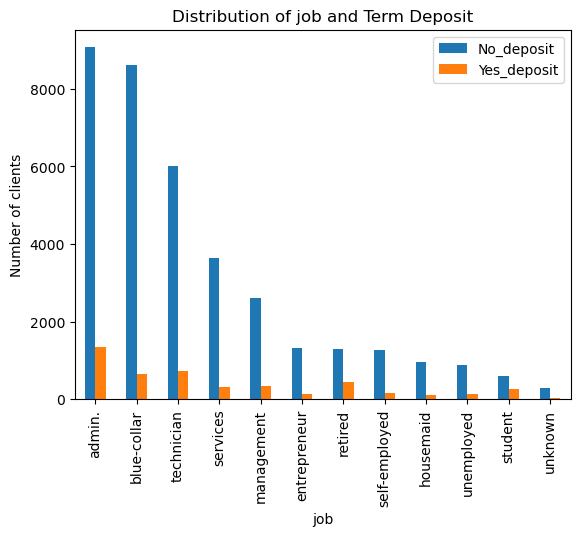

In [13]:
plot_bar('job')

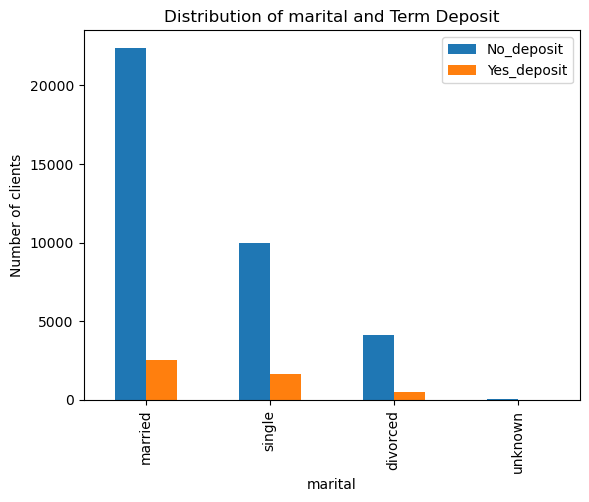

In [14]:
plot_bar('marital')

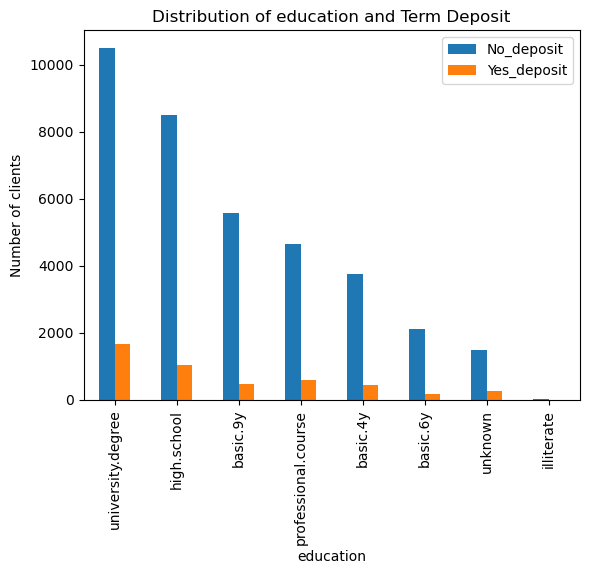

In [15]:
plot_bar('education')

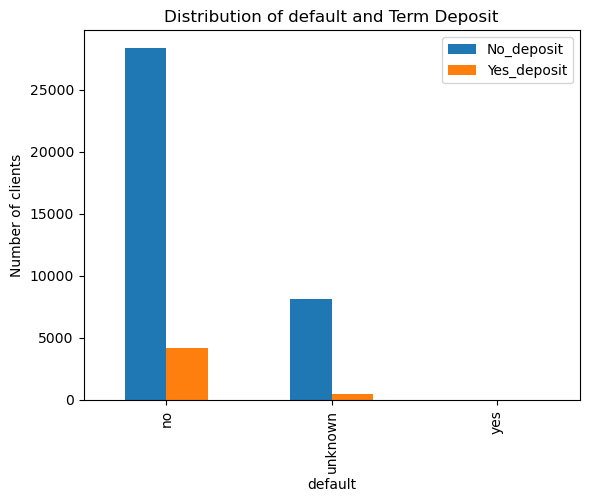

In [16]:
plot_bar('default')

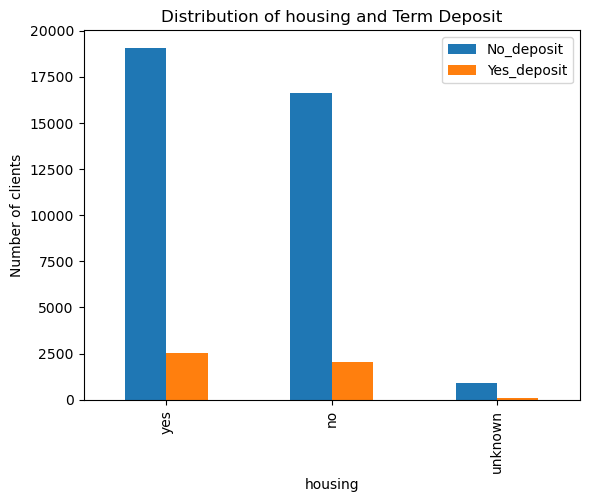

In [17]:
plot_bar('housing')

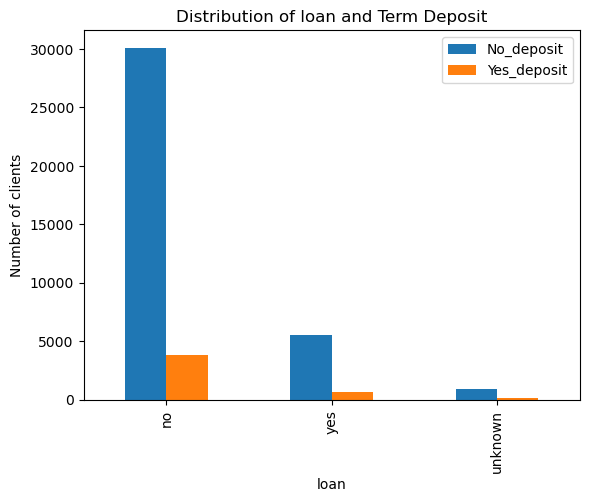

In [18]:
plot_bar('loan')

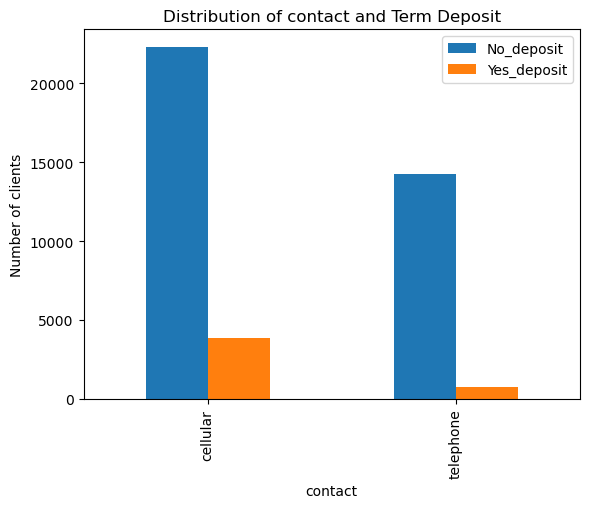

In [19]:
plot_bar('contact')

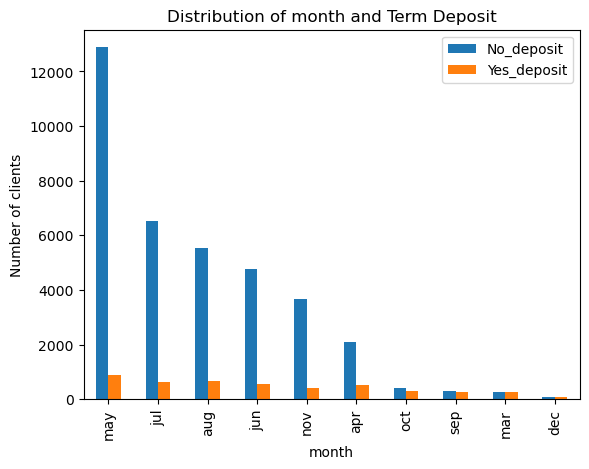

In [20]:
plot_bar('month')

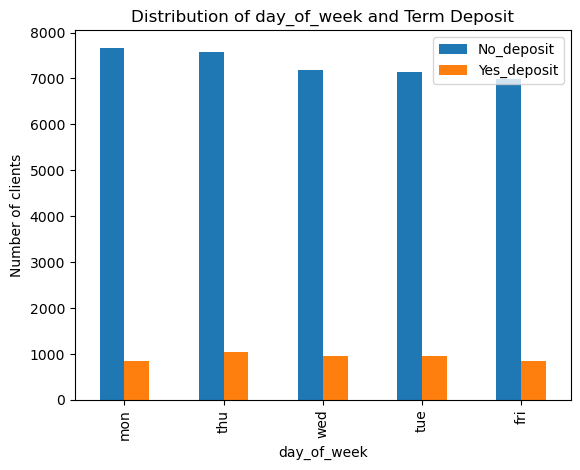

In [21]:
plot_bar('day_of_week')

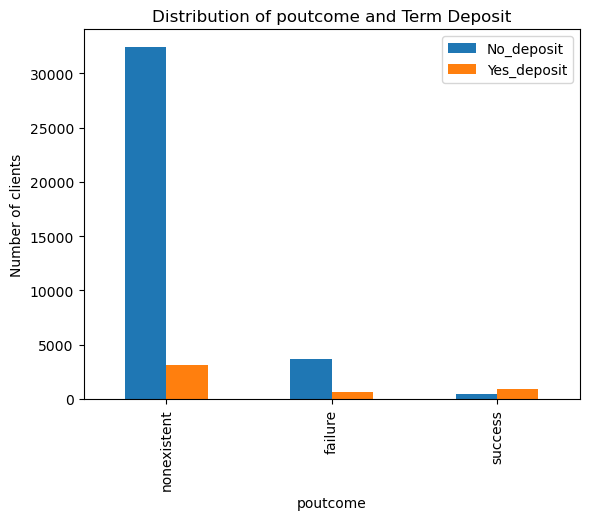

In [22]:
plot_bar('poutcome')

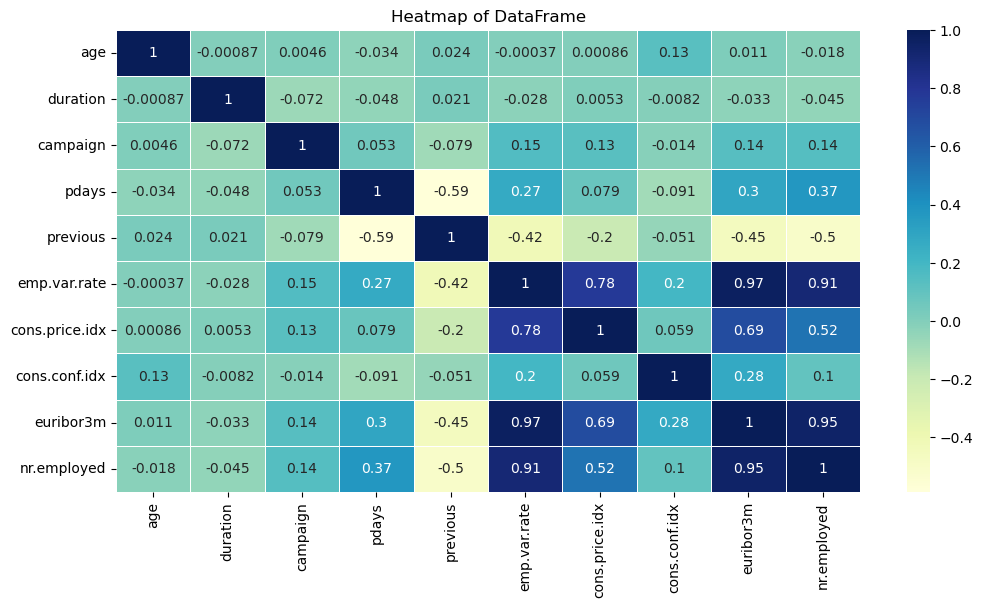

In [23]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of DataFrame')
plt.show()

## Primary Analysis

 - 1. Admin staff and technical specialists opened the deposit <b>most of all.<b>
    
    
 - 2.  In terms <b>married consumers more<b> and single is also good instead of Divorced

    
 - 3. Best communication channel is <b>Cecullar.<b>
 
    
 - 4. Those who have <b>loan that cunsumers is less found

    
 - 5. <b>Home ownership<b> does not affect.
    
    
 - 6. <b>Day of the week<b> is not affecting on cunsumer

_________________________________________________________________________________________________________

# Q.2. Perform the following pre-processing tasks: 

 - a. Missing Value Analysis
 
 - b. Label Encoding wherever required
 
 - c. Selecting important features based on Random Forest
 
 - d. Handling unbalanced data using SMOTE
 
 - e. Standardize the data using any one of the scalers provided by sklearn


#### a.Missing Value Analysis

In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There is no missing value in the dataset

In [25]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Label Encoding

In [26]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
df.shape

(41188, 21)

In [29]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


## Sampling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_df, test_df = train_test_split(df,test_size=0.2)

In [35]:
print(df.shape," ",train_df.shape," ",test_df.shape)
# Original data
# 80% for training
# 20 for testing

(41188, 21)   (32950, 21)   (8238, 21)


In [36]:
train_df_x = train_df.iloc[:,:-1]
train_df_y = train_df.iloc[:,-1]

In [37]:
test_df_x = test_df.iloc[:,:-1]
test_df_y = test_df.iloc[:,-1]

## Standarization

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [39]:
train_df_x_scaled = scalar.fit_transform(train_df_x)

In [40]:
test_df_x_scaled = scalar.transform(test_df_x)

### Model Building

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print("Logistic Regression")
print("_________________________________")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_df_x_scaled,train_df_y)
pred = logreg.predict(test_df_x_scaled)
tab = confusion_matrix(test_df_y,pred)
print(tab)
print()
print(classification_report(test_df_y,pred))
print()
print()


Logistic Regression
_________________________________

[[7139  194]
 [ 544  361]]

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7333
           1       0.65      0.40      0.49       905

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238





In [43]:
print(" Decision Tree")
print("_________________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_df_x_scaled,train_df_y)
pred = dt.predict(test_df_x_scaled)
tab = confusion_matrix(test_df_y,pred)
print(tab)
print()
print(classification_report(test_df_y,pred))
print()
print()

 Decision Tree
_________________________________

[[6880  453]
 [ 416  489]]

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7333
           1       0.52      0.54      0.53       905

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238





In [44]:
print("Random Forest")
print("_________________________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_df_x_scaled,train_df_y)
pred = rf.predict(test_df_x_scaled)
tab = confusion_matrix(test_df_y,pred)
print(tab)

print()
print(classification_report(test_df_y,pred))
print()
print()



Random Forest
_________________________________

[[7112  221]
 [ 437  468]]

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7333
           1       0.68      0.52      0.59       905

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.92      8238





In [45]:
rf.feature_importances_

array([0.09164658, 0.04898445, 0.02399514, 0.04343073, 0.00901285,
       0.02038583, 0.01444999, 0.01002546, 0.01729976, 0.04082205,
       0.32035493, 0.04234334, 0.03527957, 0.01472384, 0.03066243,
       0.01757102, 0.02451789, 0.02698539, 0.1107068 , 0.05680193])

In [46]:
imp_feature = pd.DataFrame()

In [47]:
imp_feature['Features'] = train_df_x.columns
imp_feature['Imp'] = rf.feature_importances_

In [48]:
imp_feature

,Features,Imp
0,age,0.091647
1,job,0.048984
2,marital,0.023995
3,education,0.043431
4,default,0.009013
5,housing,0.020386
6,loan,0.014450
7,contact,0.010025
8,month,0.017300
9,day_of_week,0.040822


## Top Feature

### Now Model is building on important features based on Random Forest

In [49]:
imp_feature = imp_feature[imp_feature.Imp > 0.03]

In [50]:
x = df.loc[:,list(imp_feature['Features'])]

In [51]:
x

,age,job,education,day_of_week,duration,campaign,pdays,poutcome,euribor3m,nr.employed
0,56,3,0,1,261,1,999,1,4.857,5191.0
1,57,7,3,1,149,1,999,1,4.857,5191.0
2,37,7,3,1,226,1,999,1,4.857,5191.0
3,40,0,1,1,151,1,999,1,4.857,5191.0
4,56,7,3,1,307,1,999,1,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,0,334,1,999,1,1.028,4963.6
41184,46,1,5,0,383,1,999,1,1.028,4963.6
41185,56,5,6,0,189,2,999,1,1.028,4963.6
41186,44,9,5,0,442,1,999,1,1.028,4963.6


In [52]:
 y = df.iloc[:,-1]

### Sampling

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

### Unbalanced data

In [55]:
train_y.value_counts()

0    29299
1     3651
Name: y, dtype: int64

### SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= .8)
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

### we are getting here balanced data

In [57]:
y_resampled.value_counts()

0    29299
1    23439
Name: y, dtype: int64

### Standarization

In [58]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [59]:
train_x_scaled = scalar.fit_transform(X_resampled)

In [60]:
test_x_scaled = scalar.transform(test_x)

### Model Building

## 1. Logistic Regression

In [61]:
print("Logistic Regression")
print("___________________________Prediction On Test__________________________")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_scaled,y_resampled)
pred = logreg.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(test_y,pred))
print()
print()
print("___________________________Prediction On Train__________________________")

print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_scaled,y_resampled)
pred = logreg.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(y_resampled,pred))
print()
print()

Logistic Regression
___________________________Prediction On Test__________________________

[[6305  944]
 [ 197  792]]

Accuracy =  86.14955086185968

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7249
           1       0.46      0.80      0.58       989

    accuracy                           0.86      8238
   macro avg       0.71      0.84      0.75      8238
weighted avg       0.91      0.86      0.88      8238



___________________________Prediction On Train__________________________

[[25516  3783]
 [ 4411 19028]]

Accuracy =  84.46281618567257

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     29299
           1       0.83      0.81      0.82     23439

    accuracy                           0.84     52738
   macro avg       0.84      0.84      0.84     52738
weighted avg       0.84      0.84      0.84     52738





## 2. Decision Tree

In [62]:
print(" Decision Tree")
print("________________________________Prediction on Test___________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x_scaled,y_resampled)
pred = dt.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(test_y,pred))
print()

print("____________________________Prediction on Train___________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x_scaled,y_resampled)
pred = dt.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(y_resampled,pred))
print()
print()

 Decision Tree
________________________________Prediction on Test___________________________

[[6661  588]
 [ 403  586]]

Accuracy =  87.97038116047584

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7249
           1       0.50      0.59      0.54       989

    accuracy                           0.88      8238
   macro avg       0.72      0.76      0.74      8238
weighted avg       0.89      0.88      0.88      8238


____________________________Prediction on Train___________________________

[[29299     0]
 [    0 23439]]

Accuracy =  100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29299
           1       1.00      1.00      1.00     23439

    accuracy                           1.00     52738
   macro avg       1.00      1.00      1.00     52738
weighted avg       1.00      1.00      1.00     52738





## 3. Random Forest

In [63]:
print("Random Forest")
print("_________________________________Prediction on Test___________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_scaled,y_resampled)
pred = rf.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
print(classification_report(test_y,pred))
print()
print("______________________Prediction on Train________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_scaled,y_resampled)
pred = rf.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
print(classification_report(y_resampled,pred))
print()
print()



Random Forest
_________________________________Prediction on Test___________________

[[6727  522]
 [ 277  712]]

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7249
           1       0.58      0.72      0.64       989

    accuracy                           0.90      8238
   macro avg       0.77      0.82      0.79      8238
weighted avg       0.91      0.90      0.91      8238


______________________Prediction on Train________________

[[29299     0]
 [    0 23439]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29299
           1       1.00      1.00      1.00     23439

    accuracy                           1.00     52738
   macro avg       1.00      1.00      1.00     52738
weighted avg       1.00      1.00      1.00     52738





### Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

#### For Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Parameter_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[0.5,1,2,3] ,  
                  'solver':['lbfgs', 'liblinear', 'saga']}

lr_grid = GridSearchCV(estimator = logreg, param_grid = Parameter_grid,cv = 5)
lr_grid.fit(train_x_scaled,y_resampled)
lr_grid.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
pred_grd_lr = lr_grid.predict(test_x_scaled)

In [81]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_grd_lr))
tab = confusion_matrix(test_y,pred_grd_lr) 
Accuracy_grd_lg = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_lg)
print()
print(classification_report(test_y,pred_grd_lr))


print("_________________Prediction on Train____________")
print()
pred = lr_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))



_________________Prediction on Test____________

Confusion Matrix

[[6304  945]
 [ 197  792]]
Accuracy =  86.13741199320224

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7249
           1       0.46      0.80      0.58       989

    accuracy                           0.86      8238
   macro avg       0.71      0.84      0.75      8238
weighted avg       0.91      0.86      0.88      8238

_________________Prediction on Train____________

Confusion Matrix

[[25517  3782]
 [ 4411 19028]]

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     29299
           1       0.83      0.81      0.82     23439

    accuracy                           0.84     52738
   macro avg       0.84      0.84      0.84     52738
weighted avg       0.84      0.84      0.84     52738



#### For Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

Parameter_grid = {"max_depth":[3,8,10],
                  "criterion":['gini', 'entropy'], 'min_samples_split' :[125,150,175]}


In [83]:
from sklearn.model_selection import GridSearchCV 
dt_grid = GridSearchCV(estimator = dt, param_grid = Parameter_grid,cv = 5)
dt_grid.fit(train_x_scaled,y_resampled)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 8, 10],
                         'min_samples_split': [125, 150, 175]})

In [84]:
dt_grid.best_params_     # best parameter

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 125}

In [85]:
pred_grd_dt = dt_grid.predict(test_x_scaled)

In [86]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_grd_dt))
tab = confusion_matrix(test_y,pred_grd_dt) 
Accuracy_grd_dt = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_dt)
print()
print(classification_report(test_y,pred_grd_dt))

print("_________________Prediction on Train____________")
print()
pred = dt_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))



_________________Prediction on Test____________

Confusion Matrix

[[6440  809]
 [ 165  824]]
Accuracy =  88.17674192765234

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7249
           1       0.50      0.83      0.63       989

    accuracy                           0.88      8238
   macro avg       0.74      0.86      0.78      8238
weighted avg       0.92      0.88      0.89      8238

_________________Prediction on Train____________

Confusion Matrix

[[26222  3077]
 [ 1544 21895]]

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     29299
           1       0.88      0.93      0.90     23439

    accuracy                           0.91     52738
   macro avg       0.91      0.91      0.91     52738
weighted avg       0.91      0.91      0.91     52738



#### For Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Parameter_grid = {"n_estimators" : [20,60,120],
                  "criterion":['gini', 'entropy'], "min_samples_split" : [28,35] }

rf_grid = GridSearchCV(estimator = rf, param_grid = Parameter_grid,cv = 5)
rf_grid.fit(train_x_scaled,y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [28, 35],
                         'n_estimators': [20, 60, 120]})

In [88]:
rf_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 28, 'n_estimators': 60}

In [89]:
pred_lr_rf = rf_grid.predict(test_x_scaled)

In [90]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_lr_rf))
print()
tab = confusion_matrix(test_y,pred_lr_rf) 
Accuracy_grd_rf = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_rf)
print(classification_report(test_y,pred_lr_rf))
print()
print("_________________Prediction on Train____________")
print()
pred = rf_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))

_________________Prediction on Test____________

Confusion Matrix

[[6612  637]
 [ 195  794]]

Accuracy =  89.90046127700899
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7249
           1       0.55      0.80      0.66       989

    accuracy                           0.90      8238
   macro avg       0.76      0.86      0.80      8238
weighted avg       0.92      0.90      0.91      8238


_________________Prediction on Train____________

Confusion Matrix

[[27379  1920]
 [  613 22826]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     29299
           1       0.92      0.97      0.95     23439

    accuracy                           0.95     52738
   macro avg       0.95      0.95      0.95     52738
weighted avg       0.95      0.95      0.95     52738



In [91]:
from sklearn.metrics import recall_score, precision_score,accuracy_score

In [95]:

data={ "Algorithm": ["Logistics Regression", "Decision Tree", "Random Forest"],
      "Accuracy": [Accuracy_grd_lg, Accuracy_grd_dt, Accuracy_grd_rf],
      "Recall Score":[recall_score(test_y, pred_grd_lr), recall_score(test_y, pred_grd_dt), recall_score(test_y, pred_lr_rf)],
      "Precision Score":[precision_score(test_y, pred_grd_lr), precision_score(test_y, pred_grd_dt), precision_score(test_y, pred_lr_rf)]
    }

algo_metrics= pd.DataFrame(data)
algo_metrics

,Algorithm,Accuracy,Recall Score,Precision Score
0,Logistics Regression,86.137412,0.800809,0.455959
1,Decision Tree,88.176742,0.833165,0.504593
2,Random Forest,89.900461,0.802831,0.554857


### After Hyperparameter tunning we found that Random Forest is the best model

### when we target the customer we focus on Precision Score kindly compare Accuracy and Precision Score found that Random forest is the best model